In [5]:
###########
# imports #
###########

# for folder handling
import os

# for data download
import requests 

# for data unpack
import gzip
import shutil

# for dataframe handling
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [6]:
#################
# download data #
#################

folder_name = "data"
os.makedirs(folder_name, exist_ok=True) # make dir if not exist

# base url parts
base_url = "https://mobidata-bw.de/fahrradzaehldaten/v2/fahrradzaehler_stundenwerten_"
file_extension = ".csv.gz"

# loop through years and months
for year in range(2013, 2026):  # from 2013 to 2025
    for month in range(1, 13):  # months 01 to 12

        # filename + url
        filename = f"{year}{month:02d}{file_extension}"
        url = base_url + filename
        file_path = os.path.join(folder_name, filename)
        
        # download file
        try:
            print(f"Downloading {url}...")
            response = requests.get(url)
            response.raise_for_status()
            with open(file_path, 'wb') as f:
                f.write(response.content)
            print(f"Saved to {file_path}")
        except Exception as e:
            print(f"Failed to download {url}: {e}")


Saved to data\201301.csv.gz
Saved to data\201302.csv.gz
Saved to data\201303.csv.gz
Saved to data\201304.csv.gz
Saved to data\201305.csv.gz
Saved to data\201306.csv.gz
Saved to data\201307.csv.gz
Saved to data\201308.csv.gz
Saved to data\201309.csv.gz
Saved to data\201310.csv.gz
Saved to data\201311.csv.gz
Saved to data\201312.csv.gz
Saved to data\201401.csv.gz
Saved to data\201402.csv.gz
Saved to data\201403.csv.gz
Saved to data\201404.csv.gz
Saved to data\201405.csv.gz
Saved to data\201406.csv.gz
Saved to data\201407.csv.gz
Saved to data\201408.csv.gz
Saved to data\201409.csv.gz
Saved to data\201410.csv.gz
Saved to data\201411.csv.gz
Saved to data\201412.csv.gz
Saved to data\201501.csv.gz
Saved to data\201502.csv.gz
Saved to data\201503.csv.gz
Saved to data\201504.csv.gz
Saved to data\201505.csv.gz
Saved to data\201506.csv.gz
Saved to data\201507.csv.gz
Saved to data\201508.csv.gz
Saved to data\201509.csv.gz
Saved to data\201510.csv.gz
Saved to data\201511.csv.gz
Saved to data\201512

In [7]:
###############
# unpack data #
###############

# for all .gz files in the folder
for filename in os.listdir(folder_name):
    if filename.endswith(".csv.gz"):
        gz_path = os.path.join(folder_name, filename)
        csv_path = os.path.join(folder_name, filename[:-3])  # remove the .gz extension
        
        # unpack the .gz file
        try:
            print(f"Unpacking {gz_path}...")
            with gzip.open(gz_path, 'rb') as f_in:
                with open(csv_path, 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)
            print(f"Unpacked to {csv_path}")
        except Exception as e:
            print(f"Failed to unpack {gz_path}: {e}")

Unpacking data\201301.csv.gz...
Unpacked to data\201301.csv
Unpacking data\201302.csv.gz...
Unpacked to data\201302.csv
Unpacking data\201303.csv.gz...
Unpacked to data\201303.csv
Unpacking data\201304.csv.gz...
Unpacked to data\201304.csv
Unpacking data\201305.csv.gz...
Unpacked to data\201305.csv
Unpacking data\201306.csv.gz...
Unpacked to data\201306.csv
Unpacking data\201307.csv.gz...
Unpacked to data\201307.csv
Unpacking data\201308.csv.gz...
Unpacked to data\201308.csv
Unpacking data\201309.csv.gz...
Unpacked to data\201309.csv
Unpacking data\201310.csv.gz...
Unpacked to data\201310.csv
Unpacking data\201311.csv.gz...
Unpacked to data\201311.csv
Unpacking data\201312.csv.gz...
Unpacked to data\201312.csv
Unpacking data\201401.csv.gz...
Unpacked to data\201401.csv
Unpacking data\201402.csv.gz...
Unpacked to data\201402.csv
Unpacking data\201403.csv.gz...
Unpacked to data\201403.csv
Unpacking data\201404.csv.gz...
Unpacked to data\201404.csv
Unpacking data\201405.csv.gz...
Unpacked

In [8]:
##########################
# load data to dataframe #
##########################

# pick all .csv files in the folder
all_files = [os.path.join(folder_name, f) for f in os.listdir(folder_name) if f.endswith(".csv")]

# load data from all files 
df_list = []
for file in all_files:
    try:
        print(f"Loading {file}...")
        df = pd.read_csv(
            file,
            encoding='utf-8',        # character encoding e.g. "TÃ¼bingen -> Tübingen"
            low_memory=False,        
            na_values=['na', 'NA', 'null'],  # na values
            parse_dates=['iso_timestamp']    # date column
        )
        df_list.append(df)
    except Exception as e:
        print(f"Failed to load {file}: {e}")

df_loaded = pd.concat(df_list, ignore_index=True)

# convert iso_timestamp to datetime
df_loaded['iso_timestamp'] = pd.to_datetime(df_loaded['iso_timestamp'], utc=True)

print(f"Total rows loaded: {len(df_loaded)}")
print(f"Date range: {df_loaded['iso_timestamp'].min()} to {df_loaded['iso_timestamp'].max()}")
print(f"Number of unique stations: {df_loaded['counter_site'].nunique()}")


Loading data\201301.csv...
Loading data\201302.csv...
Loading data\201303.csv...
Loading data\201304.csv...
Loading data\201305.csv...
Loading data\201306.csv...
Loading data\201307.csv...
Loading data\201308.csv...
Loading data\201309.csv...
Loading data\201310.csv...
Loading data\201311.csv...
Loading data\201312.csv...
Loading data\201401.csv...
Loading data\201402.csv...
Loading data\201403.csv...
Loading data\201404.csv...
Loading data\201405.csv...
Loading data\201406.csv...
Loading data\201407.csv...
Loading data\201408.csv...
Loading data\201409.csv...
Loading data\201410.csv...
Loading data\201411.csv...
Loading data\201412.csv...
Loading data\201501.csv...
Loading data\201502.csv...
Loading data\201503.csv...
Loading data\201504.csv...
Loading data\201505.csv...
Loading data\201506.csv...
Loading data\201507.csv...
Loading data\201508.csv...
Loading data\201509.csv...
Loading data\201510.csv...
Loading data\201511.csv...
Loading data\201512.csv...
Loading data\201601.csv...
L

In [16]:
###########################
# print dataframe details #
###########################

print(df_loaded.info())
print(df_loaded.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6122719 entries, 0 to 6122718
Data columns (total 21 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   operator_name           object             
 1   domain_name             object             
 2   domain_id               int64              
 3   counter_site            object             
 4   counter_site_id         int64              
 5   counter_serial          object             
 6   longitude               float64            
 7   latitude                float64            
 8   timezone                object             
 9   iso_timestamp           datetime64[ns, UTC]
 10  channels_in             float64            
 11  channels_out            float64            
 12  channels_unknown        float64            
 13  channels_all            int64              
 14  site_temperature        float64            
 15  site_rain_accumulation  float64            
 16  

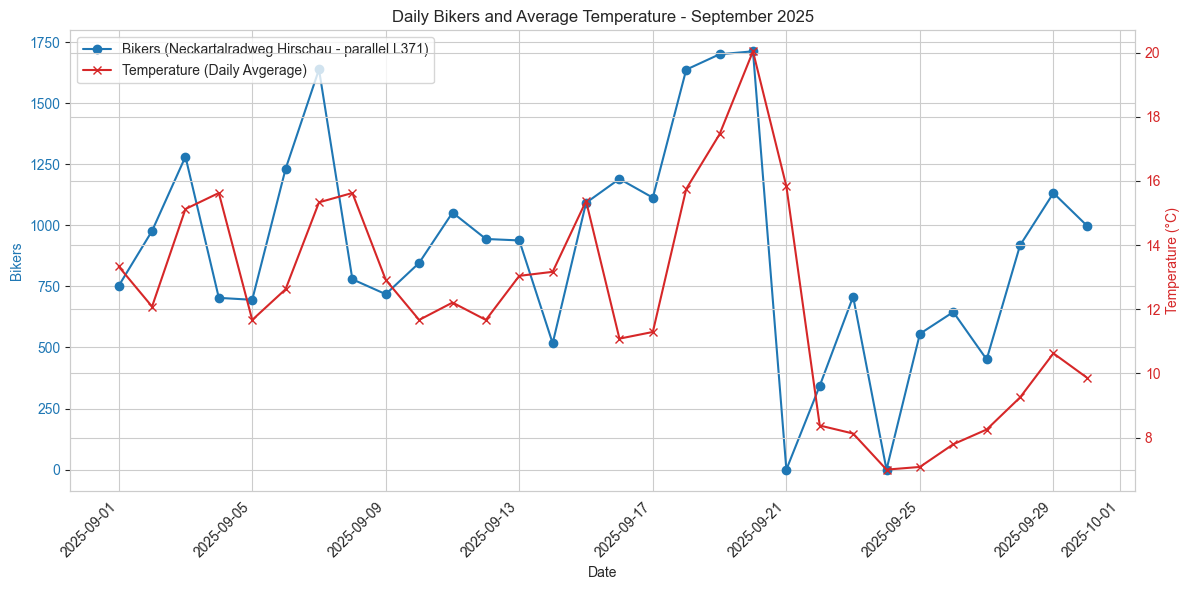

In [17]:
###############
# sample plot #
###############

# filter for September 2025
sep_2025 = df_loaded[
    (df_loaded['iso_timestamp'].dt.year == 2025) &
    (df_loaded['iso_timestamp'].dt.month == 9)
]

# daily bikers at Neckartalradweg Hirschau - parallel L371
daily_bikers = sep_2025[sep_2025['counter_site'] == 'Neckartalradweg Hirschau - parallel L371'] \
    .groupby(sep_2025['iso_timestamp'].dt.date)['channels_all'].sum()

# daily average temperature at Unter den Linden
daily_temp = sep_2025[sep_2025['counter_site'] == 'Unter den Linden'] \
    .groupby(sep_2025['iso_timestamp'].dt.date)['site_temperature'].mean()

# twin axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# bikers axis
ax1.plot(daily_bikers.index, daily_bikers.values, label='Bikers (Neckartalradweg Hirschau - parallel L371)', marker='o', color='tab:blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bikers', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# temperature axis
ax2 = ax1.twinx()
ax2.plot(daily_temp.index, daily_temp.values, label='Temperature (Daily Avgerage)', marker='x', color='tab:red')
ax2.set_ylabel('Temperature (°C)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# layout
plt.title('Daily Bikers and Average Temperature - September 2025')
fig.autofmt_xdate(rotation=45)
fig.tight_layout()

# combined legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()


In [18]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

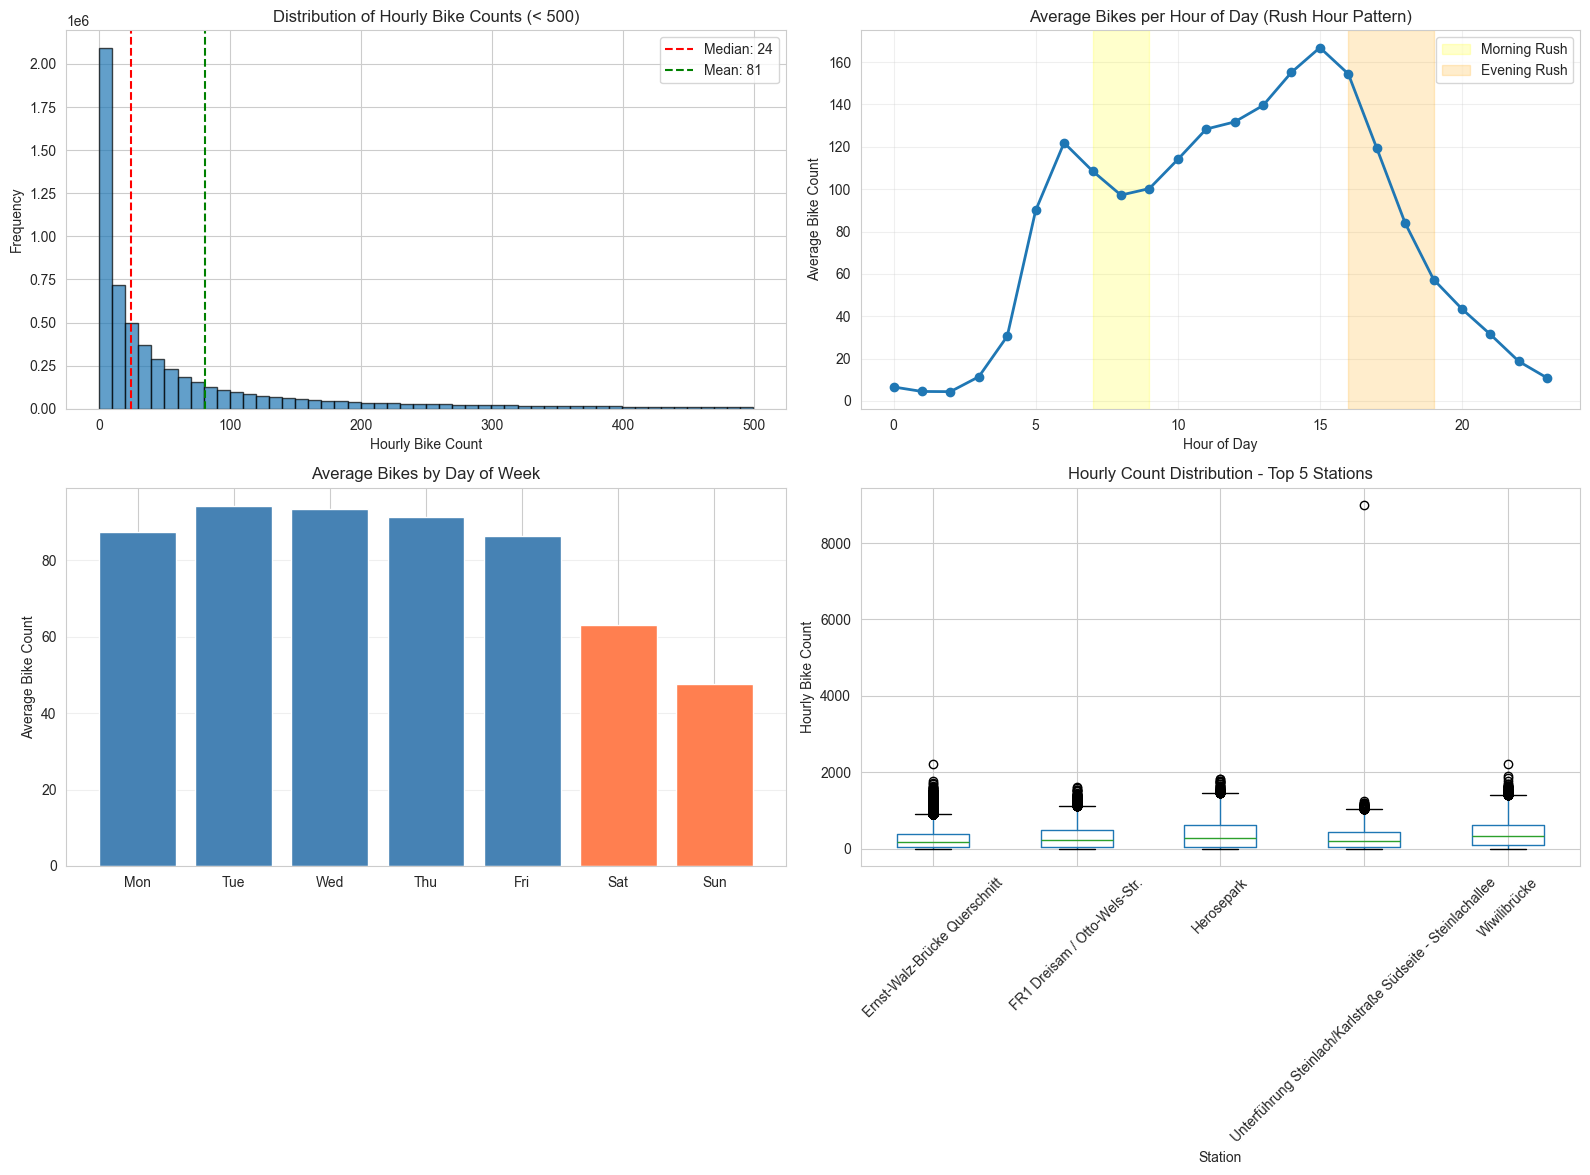

In [19]:
#######################
# 1. SANITY CHECKS    #
#######################

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('1. Sanity Checks - Data Realism', fontsize=16, fontweight='bold')

# 1.1 Distribution of hourly counts
ax = axes[0, 0]
hourly_counts = df_loaded['channels_all'].dropna()
ax.hist(hourly_counts[hourly_counts < 500], bins=50, edgecolor='black', alpha=0.7)
ax.set_xlabel('Hourly Bike Count')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Hourly Bike Counts (< 500)')
ax.axvline(hourly_counts.median(), color='red', linestyle='--', label=f'Median: {hourly_counts.median():.0f}')
ax.axvline(hourly_counts.mean(), color='green', linestyle='--', label=f'Mean: {hourly_counts.mean():.0f}')
ax.legend()

# 1.2 Hourly pattern (average by hour of day)
ax = axes[0, 1]
df_loaded['hour'] = df_loaded['iso_timestamp'].dt.hour
hourly_avg = df_loaded.groupby('hour')['channels_all'].mean()
ax.plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Bike Count')
ax.set_title('Average Bikes per Hour of Day (Rush Hour Pattern)')
ax.grid(True, alpha=0.3)
ax.axvspan(7, 9, alpha=0.2, color='yellow', label='Morning Rush')
ax.axvspan(16, 19, alpha=0.2, color='orange', label='Evening Rush')
ax.legend()

# 1.3 Weekly pattern
ax = axes[1, 0]
df_loaded['dayofweek'] = df_loaded['iso_timestamp'].dt.dayofweek
daily_avg = df_loaded.groupby('dayofweek')['channels_all'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax.bar(range(7), daily_avg.values, color=['steelblue']*5 + ['coral']*2)
ax.set_xticks(range(7))
ax.set_xticklabels(days)
ax.set_ylabel('Average Bike Count')
ax.set_title('Average Bikes by Day of Week')
ax.grid(True, alpha=0.3, axis='y')

# 1.4 Outlier detection
ax = axes[1, 1]
top_stations = df_loaded.groupby('counter_site')['channels_all'].sum().nlargest(5).index
df_top = df_loaded[df_loaded['counter_site'].isin(top_stations)]
df_top.boxplot(column='channels_all', by='counter_site', ax=ax, rot=45)
ax.set_title('Hourly Count Distribution - Top 5 Stations')
ax.set_xlabel('Station')
ax.set_ylabel('Hourly Bike Count')
plt.suptitle('')

plt.tight_layout()
plt.savefig('analysis_1_sanity_checks.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\matth\AppData\Local\Temp\ipykernel_14788\1651205795.py:67: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_loaded['year_month'] = df_loaded['iso_timestamp'].dt.to_period('M')


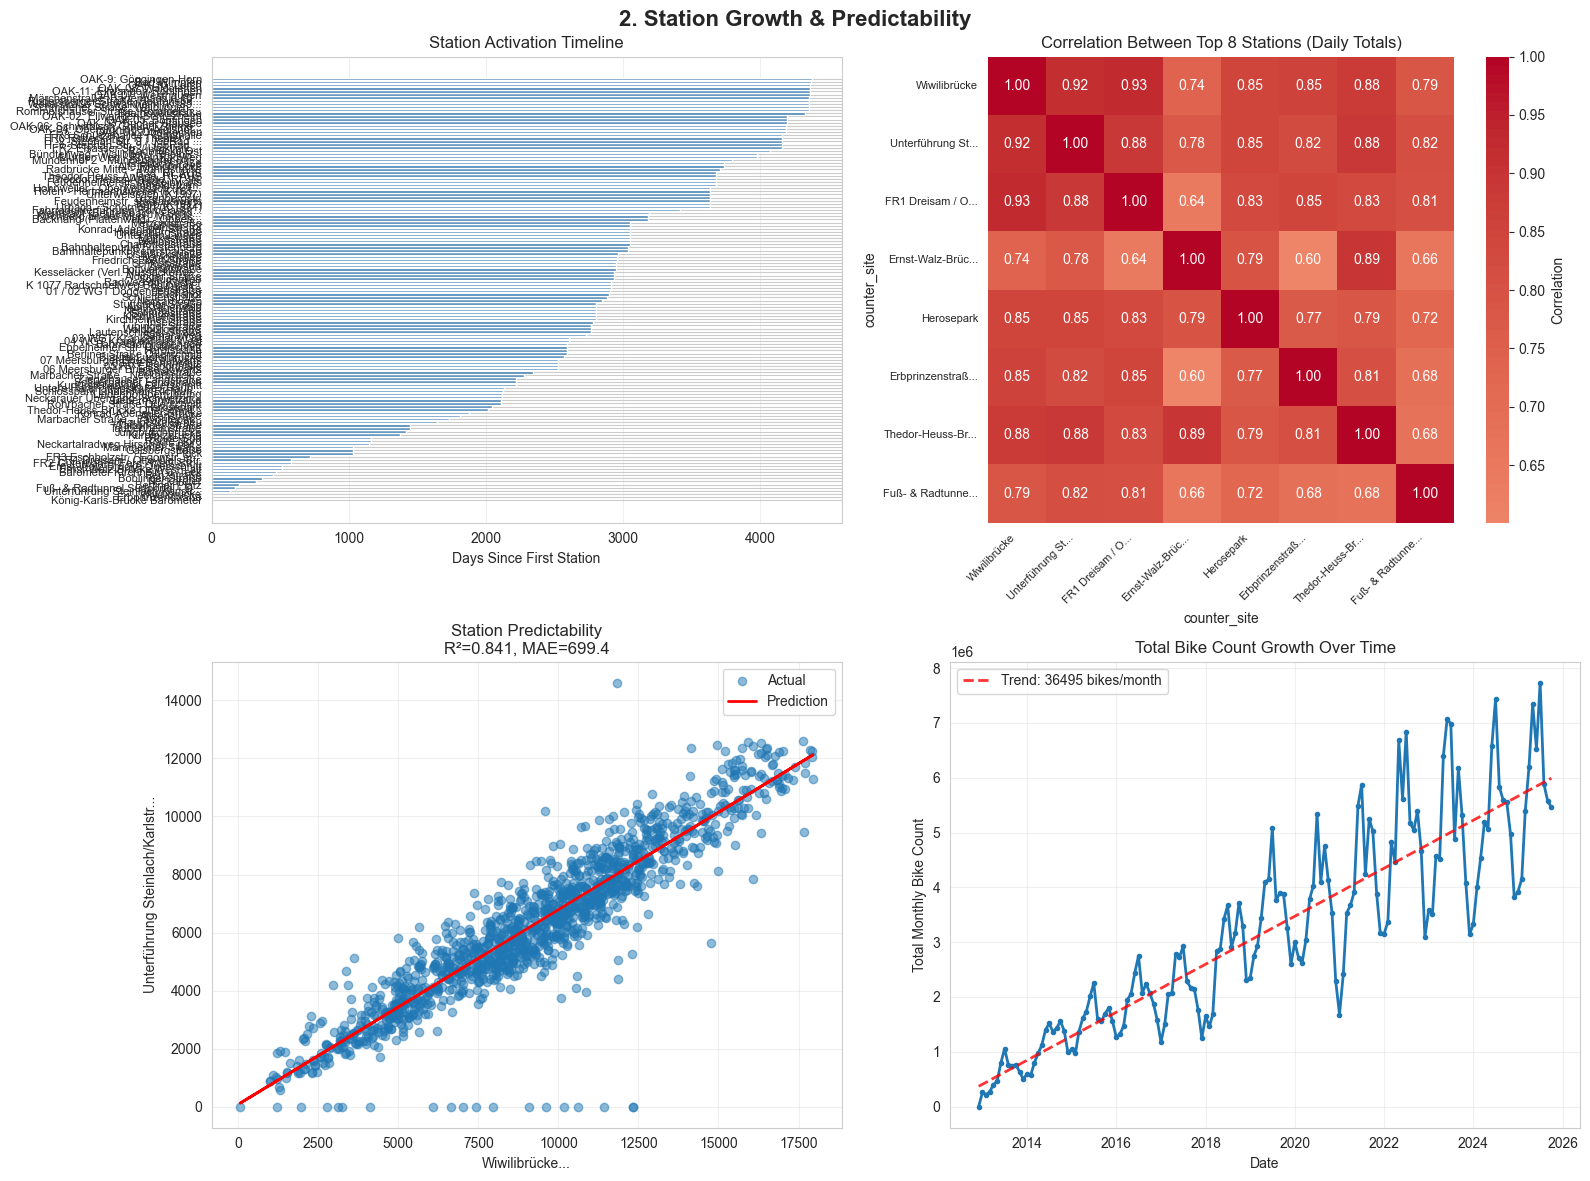

In [20]:
################################################
# 2. STATION GROWTH & PREDICTABILITY           #
################################################

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('2. Station Growth & Predictability', fontsize=16, fontweight='bold')

# 2.1 Station activation timeline
ax = axes[0, 0]
station_first = df_loaded.groupby('counter_site')['iso_timestamp'].min().sort_values()
ax.barh(range(len(station_first)), 
        (station_first - station_first.min()).dt.days,
        color='steelblue')
ax.set_yticks(range(len(station_first)))
ax.set_yticklabels([s[:30] + '...' if len(s) > 30 else s for s in station_first.index], fontsize=8)
ax.set_xlabel('Days Since First Station')
ax.set_title('Station Activation Timeline')
ax.grid(True, alpha=0.3, axis='x')

# 2.2 Correlation matrix between stations (daily totals)
ax = axes[0, 1]
df_loaded['date'] = df_loaded['iso_timestamp'].dt.date
daily_by_station = df_loaded.pivot_table(
    values='channels_all',
    index='date',
    columns='counter_site',
    aggfunc='sum'
)
# Select top 8 stations by total count
top_8_stations = daily_by_station.sum().nlargest(8).index
corr_matrix = daily_by_station[top_8_stations].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=ax, square=True, cbar_kws={'label': 'Correlation'})
ax.set_title('Correlation Between Top 8 Stations (Daily Totals)')
ax.set_xticklabels([s[:15] + '...' if len(s) > 15 else s for s in top_8_stations], rotation=45, ha='right', fontsize=8)
ax.set_yticklabels([s[:15] + '...' if len(s) > 15 else s for s in top_8_stations], rotation=0, fontsize=8)

# 2.3 Predict one station from another (regression)
ax = axes[1, 0]
if len(top_8_stations) >= 2:
    station_x = top_8_stations[0]
    station_y = top_8_stations[1]
    
    df_compare = daily_by_station[[station_x, station_y]].dropna()
    X = df_compare[station_x].values.reshape(-1, 1)
    y = df_compare[station_y].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    ax.scatter(X_test, y_test, alpha=0.5, label='Actual')
    ax.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
    ax.set_xlabel(f'{station_x[:30]}...')
    ax.set_ylabel(f'{station_y[:30]}...')
    ax.set_title(f'Station Predictability\nR²={r2:.3f}, MAE={mae:.1f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

# 2.4 Monthly growth trends
ax = axes[1, 1]
df_loaded['year_month'] = df_loaded['iso_timestamp'].dt.to_period('M')
monthly_totals = df_loaded.groupby('year_month')['channels_all'].sum()
monthly_totals.index = monthly_totals.index.to_timestamp()
ax.plot(monthly_totals.index, monthly_totals.values, linewidth=2, marker='o', markersize=3)
ax.set_xlabel('Date')
ax.set_ylabel('Total Monthly Bike Count')
ax.set_title('Total Bike Count Growth Over Time')
ax.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(range(len(monthly_totals)), monthly_totals.values, 1)
p = np.poly1d(z)
ax.plot(monthly_totals.index, p(range(len(monthly_totals))), 
        "r--", alpha=0.8, linewidth=2, label=f'Trend: {z[0]:.0f} bikes/month')
ax.legend()

plt.tight_layout()
plt.savefig('analysis_2_station_growth.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\matth\AppData\Local\Temp\ipykernel_14788\1120477799.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rain_impact = df_weather.groupby('rain_category')['channels_all'].mean()


Temperature counts per season:
 season
Summer    1467202
Spring    1423143
Fall      1398314
Winter    1323761
Name: count, dtype: int64


C:\Users\matth\AppData\Local\Temp\ipykernel_14788\1120477799.py:88: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_bikes = df_weather.groupby('season')['channels_all'].mean()


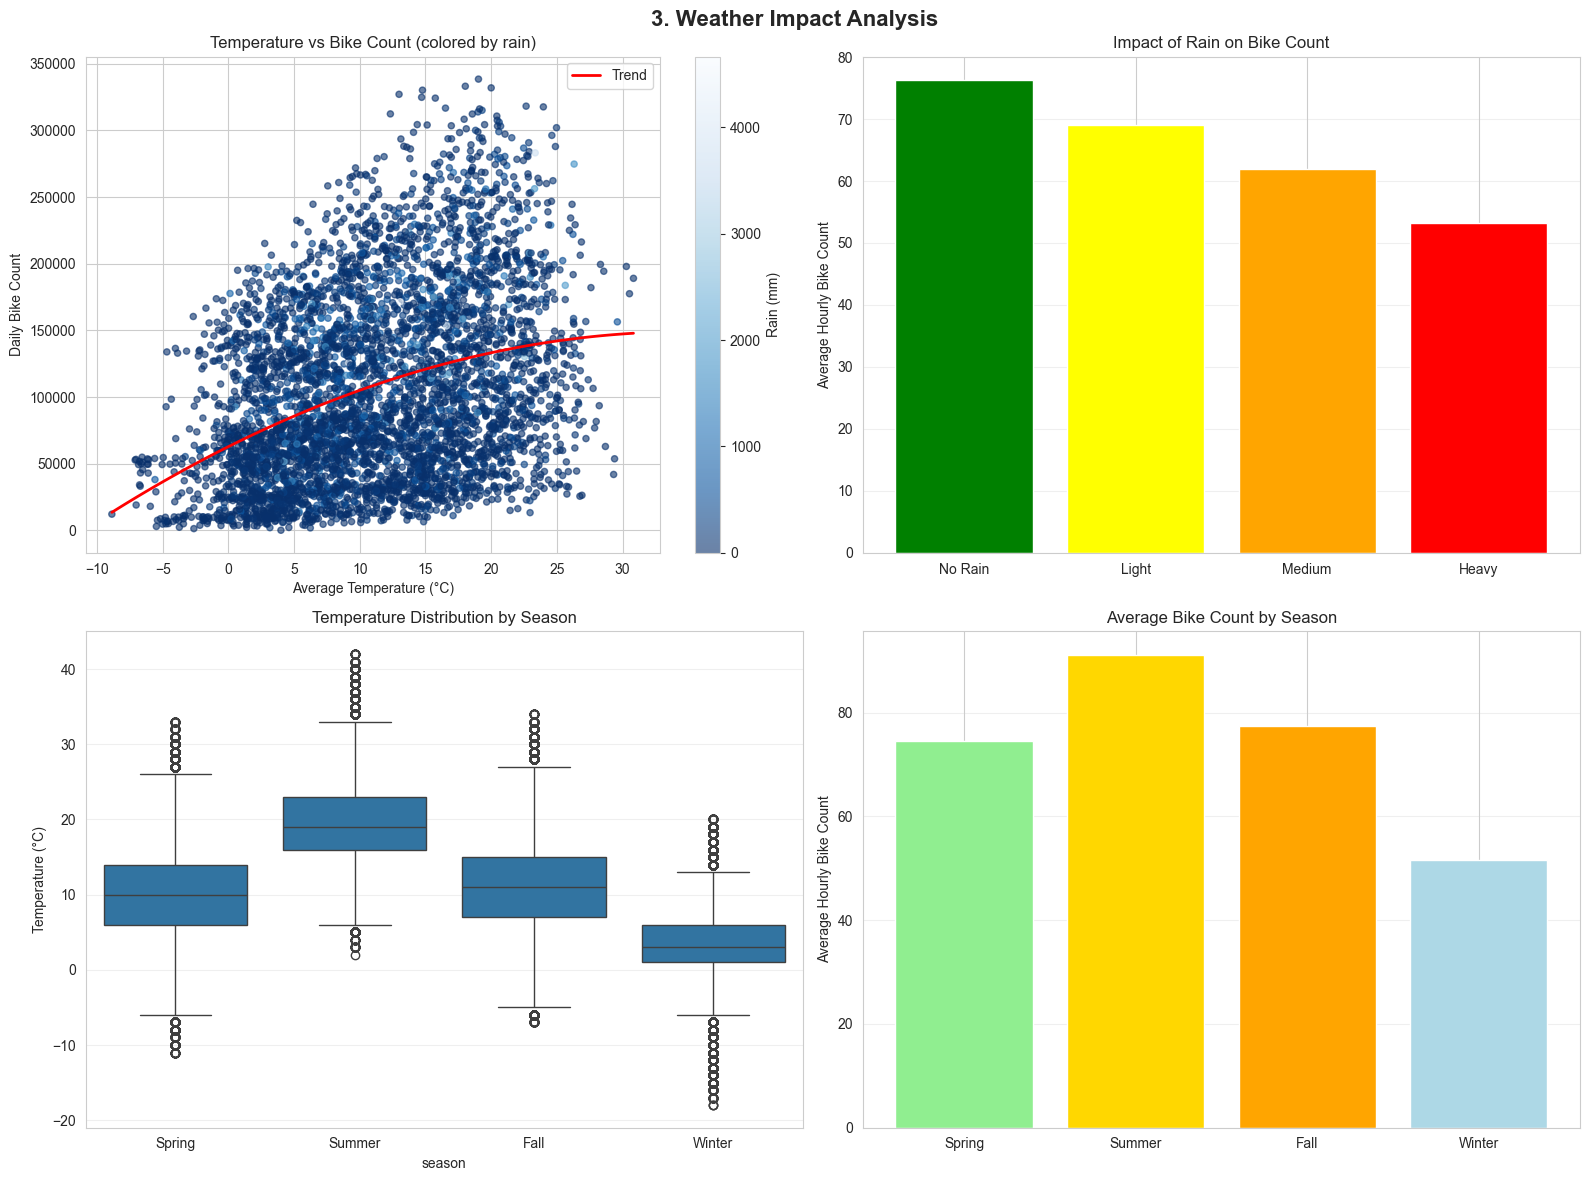

In [21]:
################################################
# 3. WEATHER ANALYSIS                          #
################################################

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('3. Weather Impact Analysis', fontsize=16, fontweight='bold')

# Prepare weather data
df_weather = df_loaded[['iso_timestamp', 'channels_all', 'site_temperature', 
                         'site_rain_accumulation', 'counter_site']].copy()
df_weather['date'] = df_weather['iso_timestamp'].dt.date
df_weather['hour'] = df_weather['iso_timestamp'].dt.hour

# 3.1 Temperature vs Bike Count
ax = axes[0, 0]
daily_weather = df_weather.groupby('date').agg({
    'channels_all': 'sum',
    'site_temperature': 'mean',
    'site_rain_accumulation': 'sum'
}).dropna()

# Sample for visualization (too many points)
sample_size = min(5000, len(daily_weather))
sample_idx = np.random.choice(daily_weather.index, sample_size, replace=False)
sample_data = daily_weather.loc[sample_idx]

scatter = ax.scatter(sample_data['site_temperature'], 
                     sample_data['channels_all'],
                     c=sample_data['site_rain_accumulation'],
                     cmap='Blues_r', alpha=0.6, s=20)
ax.set_xlabel('Average Temperature (°C)')
ax.set_ylabel('Daily Bike Count')
ax.set_title('Temperature vs Bike Count (colored by rain)')

# Add trend line
mask = ~np.isnan(sample_data['site_temperature']) & ~np.isnan(sample_data['channels_all'])
if mask.sum() > 0:
    z = np.polyfit(sample_data['site_temperature'][mask], sample_data['channels_all'][mask], 2)
    p = np.poly1d(z)
    temp_range = np.linspace(sample_data['site_temperature'].min(), 
                             sample_data['site_temperature'].max(), 100)
    ax.plot(temp_range, p(temp_range), "r-", linewidth=2, label='Trend')
    ax.legend()

plt.colorbar(scatter, ax=ax, label='Rain (mm)')

# 3.2 Rain impact
ax = axes[0, 1]
df_weather['rain_category'] = pd.cut(df_weather['site_rain_accumulation'], 
                                      bins=[-0.1, 0, 0.5, 2, 100],
                                      labels=['No Rain', 'Light', 'Medium', 'Heavy'])
rain_impact = df_weather.groupby('rain_category')['channels_all'].mean()
ax.bar(range(len(rain_impact)), rain_impact.values, 
       color=['green', 'yellow', 'orange', 'red'])
ax.set_xticks(range(len(rain_impact)))
ax.set_xticklabels(rain_impact.index)
ax.set_ylabel('Average Hourly Bike Count')
ax.set_title('Impact of Rain on Bike Count')
ax.grid(True, alpha=0.3, axis='y')

# 3.3 Temperature distribution by season (robust)
ax = axes[1, 0]

# ensure date and temperature are present and numeric
df_weather = df_weather.copy()
df_weather = df_weather.dropna(subset=['date', 'site_temperature'])
df_weather['month'] = pd.to_datetime(df_weather['date']).dt.month
df_weather['season'] = df_weather['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
df_weather['season'] = pd.Categorical(df_weather['season'], categories=season_order, ordered=True)

# debug counts (optional)
print('Temperature counts per season:\n', df_weather['season'].value_counts())

# use seaborn boxplot (handles empty categories gracefully)
sns.boxplot(x='season', y='site_temperature', data=df_weather, order=season_order, ax=ax)
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature Distribution by Season')
ax.grid(True, alpha=0.3, axis='y')

# 3.4 Bike count by season and weather
ax = axes[1, 1]
season_bikes = df_weather.groupby('season')['channels_all'].mean()
ax.bar(range(len(season_bikes)), season_bikes.values, 
       color=['lightgreen', 'gold', 'orange', 'lightblue'])
ax.set_xticks(range(len(season_bikes)))
ax.set_xticklabels(season_order)
ax.set_ylabel('Average Hourly Bike Count')
ax.set_title('Average Bike Count by Season')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('analysis_3_weather_impact.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
################################################
# 4. STATISTICS                                #
################################################

print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)

print("\n1. DATA QUALITY:")
print(f"   - Total records: {len(df_loaded):,}")
print(f"   - Missing values (channels_all): {df_loaded['channels_all'].isna().sum():,} ({df_loaded['channels_all'].isna().sum()/len(df_loaded)*100:.2f}%)")
print(f"   - Missing values (temperature): {df_loaded['site_temperature'].isna().sum():,} ({df_loaded['site_temperature'].isna().sum()/len(df_loaded)*100:.2f}%)")
print(f"   - Outliers (>1000/hour): {(df_loaded['channels_all'] > 1000).sum():,}")

print("\n2. BIKE COUNT STATISTICS:")
print(f"   - Mean hourly count: {df_loaded['channels_all'].mean():.2f}")
print(f"   - Median hourly count: {df_loaded['channels_all'].median():.2f}")
print(f"   - Max hourly count: {df_loaded['channels_all'].max():.0f}")
print(f"   - Daily average: {df_loaded.groupby('date')['channels_all'].sum().mean():.0f}")

print("\n3. WEATHER CORRELATION:")
temp_corr = df_weather[['channels_all', 'site_temperature']].corr().iloc[0, 1]
print(f"   - Temperature correlation: {temp_corr:.3f}")
no_rain_avg = df_weather[df_weather['site_rain_accumulation'] == 0]['channels_all'].mean()
rain_avg = df_weather[df_weather['site_rain_accumulation'] > 0]['channels_all'].mean()
print(f"   - Avg count (no rain): {no_rain_avg:.1f}")
print(f"   - Avg count (rain): {rain_avg:.1f}")
print(f"   - Rain impact: {(rain_avg/no_rain_avg - 1)*100:.1f}%")

print("\n4. STATION INSIGHTS:")
print(f"   - Number of stations: {df_loaded['counter_site'].nunique()}")
print(f"   - Highest correlation: {corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].max():.3f}")
print(f"   - Lowest correlation: {corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)].min():.3f}")


STATISTICAL SUMMARY

1. DATA QUALITY:
   - Total records: 6,122,719
   - Missing values (channels_all): 0 (0.00%)
   - Missing values (temperature): 510,299 (8.33%)
   - Outliers (>1000/hour): 10,214

2. BIKE COUNT STATISTICS:
   - Mean hourly count: 80.51
   - Median hourly count: 24.00
   - Max hourly count: 9002
   - Daily average: 105149

3. WEATHER CORRELATION:
   - Temperature correlation: 0.246
   - Avg count (no rain): 76.3
   - Avg count (rain): 66.7
   - Rain impact: -12.5%

4. STATION INSIGHTS:
   - Number of stations: 136
   - Highest correlation: 0.926
   - Lowest correlation: 0.601
